<br> 
<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222">
<br>
<br>  

<br>
<br>   
<br>
<br>


<h1 style="text-align: center"> AITUHackDay: GIS Technologies </h1>
<h1 style="text-align: center"> Задание. НИЦ Big Data and Blockchain </h1> 
 
<br>
<br>

<br>
<br>
<br>
<br>


<h3 style="text-align: right">Команда:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Moonlight</p> 

<h3 style="text-align: right">Члены команды:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Бекдаулет Магаданов,</p>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Олжас Уйкас, Мерей Оразалы,</p>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Жулдыз Амангельдиева,</p>

<br>
<br>
<br>



<p style="text-align: center; font-size: 18px; margin-right: 49px;">Астана, 2022</p>
<br>
<br>
<br>

## План работы: 
1. Загрузка файлов
2. Введение
3. Вегетационные индексы
4. Кластеризация
5. Карта продуктивности
6. Матрица продуктивности

## 1. Загрузка файлов

In [45]:
# Импортирование библиотек
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import rasterio  as rs
from rasterio.plot import show

from sklearn.cluster import KMeans

from matplotlib.colors import LinearSegmentedColormap

import os

### 1.1 Спутниковые снимки выбранного поля в Республике Казахстан (с мая по август)

In [2]:
path_land = "/Users/mereyorazaly/Desktop/поле_датасет"
dir_list_land = os.listdir(path_land)

print("Files and directories in '", path_land, "' :")
print(dir_list_land)

Files and directories in ' /Users/mereyorazaly/Desktop/поле_датасет ' :
['01-07-2022.tiff', '23-06-2022.tiff', '02-05-2022.tiff', '11-06-2022.tiff', '24-05-2022.tiff', '15-08-2022.tiff', '25-08-2022.tiff', '26-07-2022.tiff']


<img src="Поле.png" width="1000" height="1000" >

**Комментарий:**
Для получения снимков выбранного поля был использован сайт  <a href="https://crop-monitoring.eos.com/analytics/field/8604699?period_from=2021-11-25&period_to=2022-12-08&sceneID=S2B_tile_20221123_42UXD_0">Crop Monitoring</a>. 
- Координаты: 52.5168° N 70.9455° E
- Местоположение: Енбекшильдерский район, село Макинка
- Площадь поля: 98.9 га
- Зерновая культура: озимая пшеница

<img src="Поле_гуглмап.png" width="1000" height="1000" >

### 1.2 Предоставленные спутниковые снимки от организаторов

In [3]:
path = "/Users/mereyorazaly/Desktop/2021_8-2"
dir_list = os.listdir(path)

print("Files and directories in '", path, "' :")
print(dir_list)

Files and directories in ' /Users/mereyorazaly/Desktop/2021_8-2 ' :
['28-07-2021_8-2.tif', '31-07-2021_8-2.tif', '13-07-2021_8-2.tif', '02-05-2021_8-2.tif', '16-06-2021_8-2.tif', '29-05-2021_8-2.tif', '27-05-2021_8-2.tif', '18-06-2021_8-2.tif', '02-08-2021_8-2.tif', '18-07-2021_8-2.tif', '06-06-2021_8-2.tif']


## 2. Введение

Спектральная отражательная способность растительных организмов в разных диапазонах, которая измеряется сенсорами, служит индикатором наличия вегетации, а также ее общего состояния и развития.

Вегетационный индекс также помогает исследовать такие характеристики культур, как биомасса, интенсивность роста, густота покрова и т.д. Существует более ста индексов для вегетационного анализа, узнать подробнее о них можно в <a href="https://www.indexdatabase.de/search/i-search.php?s=vegetation">базе данных индексов</a>. 

## 3. Вегетационные индексы

<h1 style="text-align: center"> NDVI </h1> 
<br>

В агрономии для определения вегетации растений используются разные индексы, самый популярный из них — **NDVI**.

NDVI (Normalized difference vegetation index, Нормализованный вегетационный индекс) — это показатель здоровья растения, который вычисляется по тому, как растение отражает и поглощает разные световые волны.

Пигмент хлорофилл отражает зелёные и поглощает красные волны: благодаря этому происходит фотосинтез. Здоровое растение, в котором хорошая клеточная структура и много хлорофилла, активно поглощает красный свет и отражает ближний инфракрасный. Больное растение — наоборот.

<img src="https://cleverfarmer.ru/upload/medialibrary/1b9/1b9a555e207eb70ff7d672a96b7d70cf.png" 
     width="500" height="500">

In [4]:
# Функция для вычисления NDVI
def ndvi_cc(NIR, Red):
    ndvi = np.divide((NIR - Red), (NIR + Red))
    ndvi[np.isnan(ndvi)] = 0
    return ndvi

<img src="https://agroinfo.kz/wp-content/uploads/2019/02/Чтение-значений-индекса-NDVI.jpg" 
     width="800" height="800">

Как вы, наверняка, знаете, NDVI шкала варьируется в пределах от -1 до 1. Отрицательные значения дают водные поверхности, строения, горы, облака, снег; открытой почве обычно соответствует индекс 0,1- 0,2. В случае растений – это всегда положительные значения от 0,2 до 1. Показатель здоровой, густой растительности должен быть выше 0,5; для разреженней – цифра будет колебаться от 0,2 до 0,5.

<h1 style="text-align: center"> RECI </h1> 
<br>

Вегетационный индекс ReCI зависит от содержания хлорофилла в листьях, питаемых азотом. ReCI показывает фотосинтетическую активность кроны. ReCl наиболее показателен во время активного развития вегетации и не подходит для мониторинга растительности во время сбора урожая.

$$RECI = \frac{NIR}{RED}-1 $$

In [5]:
# Функция для вычисления RECI
def reci_cc(NIR, Red):
    reci = np.divide(NIR, Red)-1
    reci[np.isnan(reci)] = 0
    return reci

<h1 style="text-align: center"> NDWI </h1> 
<br>

**NDWI**(англ. Normalized Difference Water Index) - нормализованный разностный водный индекс. используется для определения объектов открытых водных пространств и их выделения на спутниковом снимке на фоне почвы и растительности.

Сегодня, он применяется для обнаружения и мониторинга малейших  изменений в содержании водных объектов. Используя преимущества спектральных диапазонов NIR (ближний инфракрасный) и GREEN (видимый зеленый), NDWI может усилить присутствие водных объектов на спутниковом снимке. Недостатком данного индекса является чувствительность к строительным конструкциям, которая может приводить к переоценке водных объектов.

$$NDWI = \frac{Green - NIR}{Green + NIR} $$

In [6]:
# Функция для вычисления NDWI
def ndwi_cc(NIR, Green):
    ndwi = np.divide((Green - NIR), (Green + NIR))
    ndwi[np.isnan(ndwi)] = 0
    return ndwi

<h1 style="text-align: center"> EVI </h1> 
<br>

**EVI** (англ. Enhanced Vegetation Index) - усовершенствованный вегетационный индекс. Разработан как улучшение NDVI путем оптимизации сигнала растительности в областях с высоким индексом листовой поверхности (LAI). Индекс использует синюю область отражения для коррекции фоновых сигналов почвы и уменьшения атмосферных воздействий, в том числе аэрозольного рассеяния. Наиболее полезен в регионах с высоким уровнем LAI, где NDVI может перенасыщаться.

<img src="https://miro.medium.com/max/1400/1*B_weeGE5xY-0PjQa5VcKAA.png" width="500" height="300">

And the four coefficients are G (gain factor) = 2.5, C1 = 6, C2 = 7.5, and L=1.

In [7]:
# Функция для вычисления EVI
def evi_cc(NIR, Red, Blue):
    NIR_ = np.divide(NIR, 10000)
    Red_ = np.divide(Red, 10000)
    Blue_ = np.divide(Blue, 10000)

    up = NIR_ - Red_
    down = (NIR_ + 6 * Red_ - 7.5 * Blue_ + 1)
    
    evi = np.multiply(2.5, np.divide(up, down))
    evi[np.isnan(evi)] = 0
    return evi

<h1 style="text-align: center"> GNDVI </h1> 
<br>

**GNDVI** (англ. Green Normalized Difference Vegetation Index) - зеленый нормализованный относительный вегетационный индекс. Похож на NDVI за исключением того, что он вместо красного спектра измеряет зеленый в диапазоне от 0,54 до 0,57 мкм. Это показатель фотосинтетической активности растительного покрова, наиболее часто используемый при оценке влагосодержания и концентрации азота в листьях растений по мультиспектральным данным, у которых отсутствует крайний красный канал. По сравнению с индексом NDVI, более чувствителен к концентрации хлорофилла. Применяется при оценке угнетенной и стареющей растительности.

$$GNDVI = \frac{NIR - Green}{NIR + Green} $$

In [8]:
# Функция для вычисления GNDVI
def gndvi_cc(NIR, Green):
    gndvi = np.divide((NIR - Green), (NIR + Green))
    gndvi[np.isnan(gndvi)] = 0
    return gndvi

<h1 style="text-align: center"> CVI </h1> 
<br>

**CVI** (англ. Chlorophyll Vegetation Index) - вегетационный индекс хлорофилла. Имеет повышенную чувствительность к содержанию хлорофилла в лиственном покрове. Используется с начала и до середины цикла роста культур для широкого диапазона почв и условий посева путем анализа большого набора синтетических данных, полученных с использованием модели отражения листовой поверхности. Повышенная чувствительность индекса к концентрации хлорофилла в листе обусловлена ​​эффективной нормализацией различных значений LAI, полученных при введении красного и зеленого цветов.

$$CVI = \frac{NIR}{Green}*\frac{Red}{Green} $$

In [9]:
# Функция для вычисления CVI
def cvi_cc(NIR, Red, Green):
    cvi = np.multiply(np.divide(NIR, Green), np.divide(Red, Green))
    cvi[np.isnan(cvi)] = 0
    return cvi

### Диапазоны (Bands):
- Диапазон 4 = NIR
- Диапазон 3 = Red
- Диапазон 2 = Blue
- Диапазон 1 = Green

### Выбранное поле

In [10]:
# Создание листов для 6ти индексов
list_ndvi = []
list_reci = []
list_ndwi = []
list_evi = []
list_gndvi = []
list_cvi = []

for file in dir_list:
    dataset = rs.open("/Users/mereyorazaly/Desktop/2021_8-2/{}".format(file))
    
    # Обозначаем диапазоны 
    NIR = dataset.read(4)
    Red = dataset.read(3)
    Blue = dataset.read(2)
    Green = dataset.read(1)
    
    # Вычисление индексов
    ndvi = ndvi_cc(NIR, Red)
    reci = reci_cc(NIR, Red)
    ndwi = ndwi_cc(NIR, Green)
    evi = evi_cc(NIR, Red, Blue)
    gndvi = gndvi_cc(NIR, Green)
    cvi = cvi_cc(NIR, Red, Green)
    
    # Отправляем значения в листы 
    list_ndvi.append(ndvi)
    list_reci.append(reci)
    list_ndwi.append(ndwi)
    list_evi.append(evi)
    list_gndvi.append(gndvi)
    list_cvi.append(cvi)

In [11]:
page = len(list_ndvi)
print(page)

shape = list_ndvi[0].shape
print(shape, shape[0], shape[1])

11
(130, 148) 130 148


In [12]:
def mdn(lst, page, shape):
    new = np.zeros(shape)
    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            res = 0 
            for pg in range(0, page):
                res += lst[pg][i][j]
            new[i][j] = res/int(page)
    return new

In [13]:
def plot_(lst, name):
    fig, axs = plt.subplots()
    plot_ = axs.imshow(lst, cmap="RdYlGn")
    axs.set_title(name)
    fig.colorbar(plot_, ax=axs)
    plt.show()

## NDVI

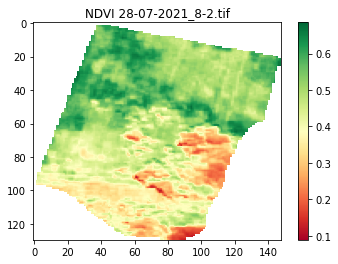

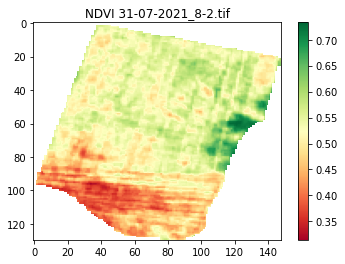

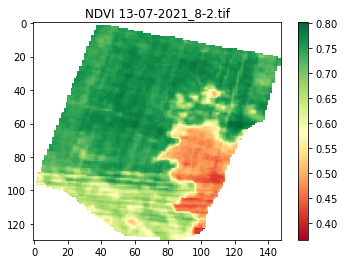

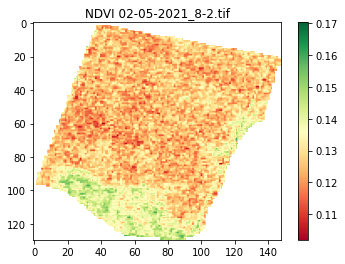

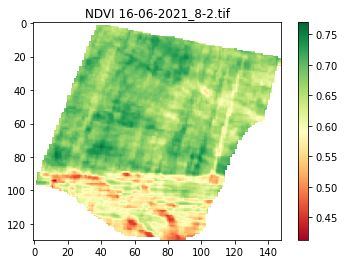

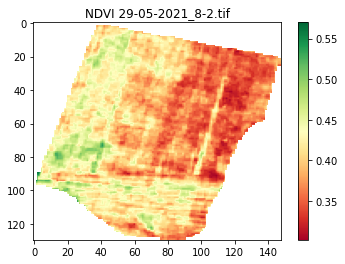

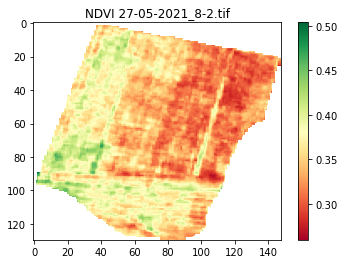

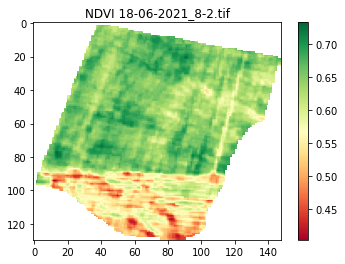

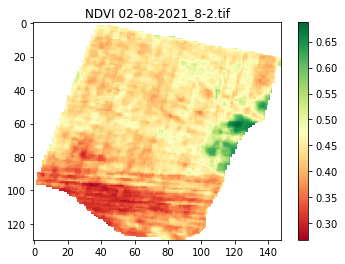

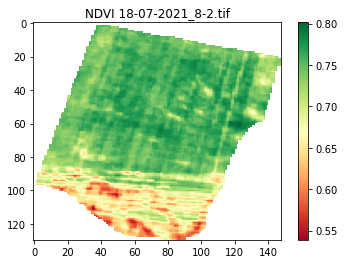

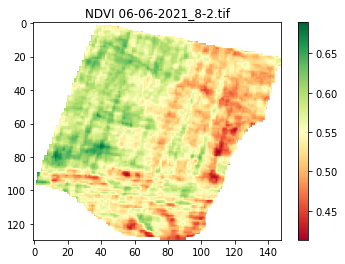

In [14]:
plot_ndvi = [np.zeros(list_ndvi[i].shape) for i in range(len(list_ndvi))]
for j in range(len(plot_ndvi)):
    for i in range(len(list_ndvi[j].reshape(1,-1)[0])):
        plot_ndvi[j].reshape(1,-1)[0][i] = list_ndvi[j].reshape(1,-1)[0][i]
        if plot_ndvi[j].reshape(1,-1)[0][i] == 0:
            plot_ndvi[j].reshape(1,-1)[0][i] = np.nan
            
        
        
for i in range(len(plot_ndvi)):
    fig, axs = plt.subplots(1,1)
    
    
    ndvi_plot = axs.imshow(plot_ndvi[i], cmap="RdYlGn")
    axs.set_title("NDVI {}".format(dir_list[i]))
    fig.colorbar(ndvi_plot, ax=axs)

    plt.show()

## Vegetation Rating layer

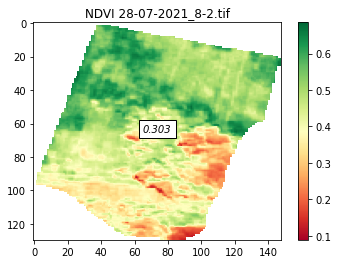

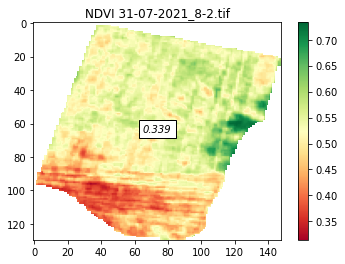

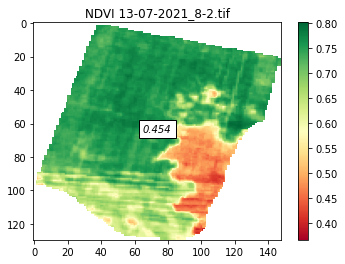

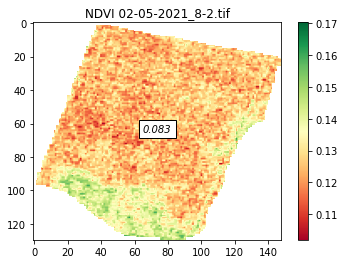

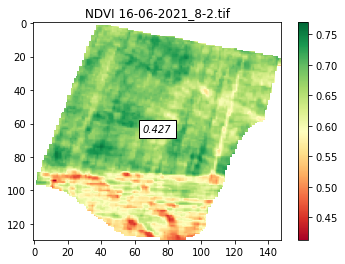

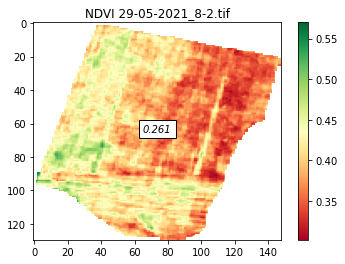

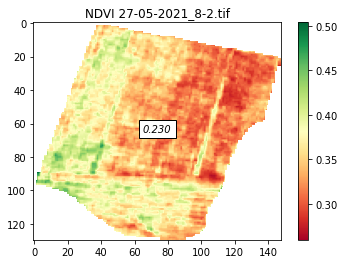

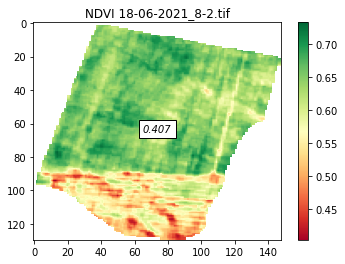

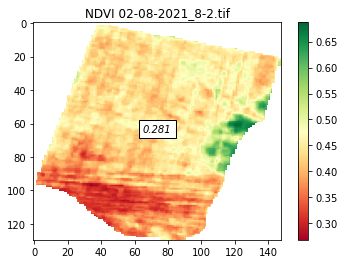

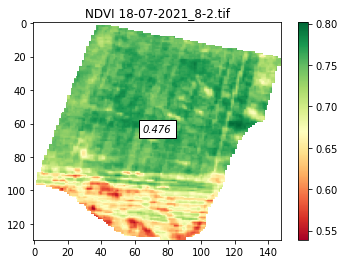

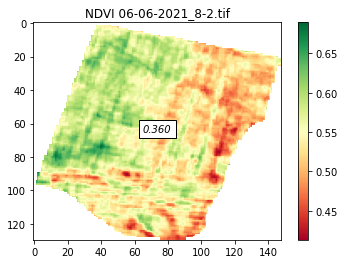

In [15]:
plot_ndvi = [np.zeros(list_ndvi[i].shape) for i in range(len(list_ndvi))]
for j in range(len(plot_ndvi)):
    for i in range(len(list_ndvi[j].reshape(1,-1)[0])):
        plot_ndvi[j].reshape(1,-1)[0][i] = list_ndvi[j].reshape(1,-1)[0][i]
        if plot_ndvi[j].reshape(1,-1)[0][i] == 0:
            plot_ndvi[j].reshape(1,-1)[0][i] = np.nan
            
for i in range(len(list_ndvi)):
    mean_ndvi = list_ndvi[i].reshape(1,-1)[0].mean()
    
    fig, axs = plt.subplots(1,1)
    
    
    ndvi_plot = axs.imshow(plot_ndvi[i], cmap="RdYlGn")
    axs.set_title("NDVI {}".format(dir_list[i]))
    fig.colorbar(ndvi_plot, ax=axs)

    axs.text(65, 65, "{:.3f}".format(mean_ndvi), style='italic',
        bbox={'facecolor': 'white'})
    plt.show()

## ReCl

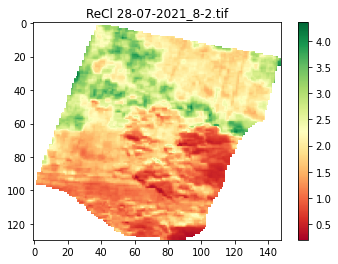

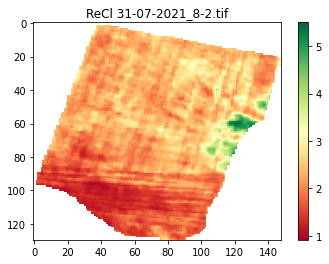

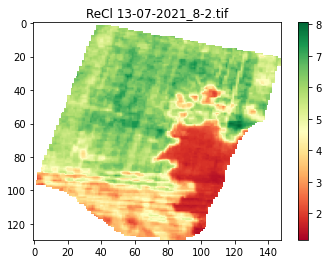

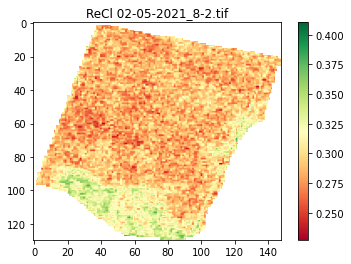

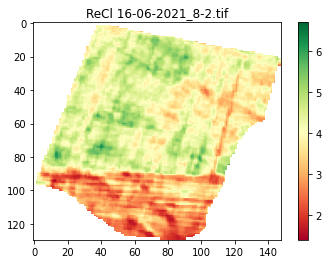

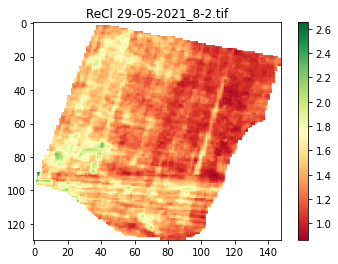

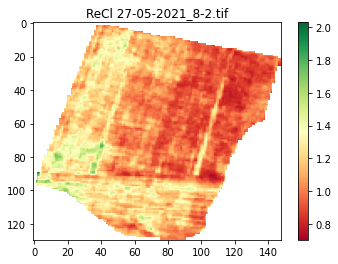

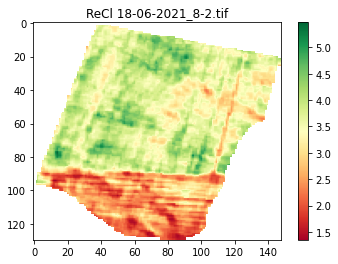

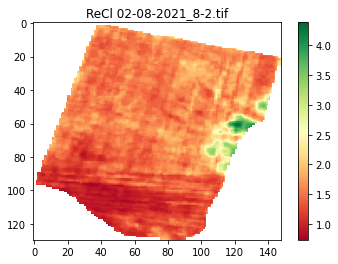

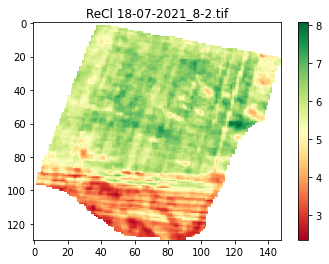

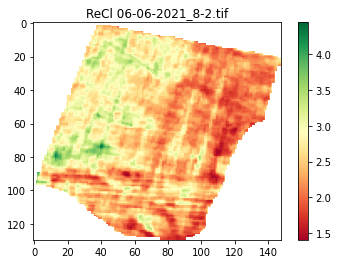

In [16]:
plot_reci = [np.zeros(list_reci[i].shape) for i in range(len(list_reci))]
for j in range(len(plot_reci)):
    for i in range(len(list_reci[j].reshape(1,-1)[0])):
        plot_reci[j].reshape(1,-1)[0][i] = list_reci[j].reshape(1,-1)[0][i]
        if plot_reci[j].reshape(1,-1)[0][i] == 0:
            plot_reci[j].reshape(1,-1)[0][i] = np.nan
            
        
        
for i in range(len(plot_reci)):
    fig, axs = plt.subplots(1,1)
    
    
    reci_plot = axs.imshow(plot_reci[i], cmap="RdYlGn")
    axs.set_title("ReCl {}".format(dir_list[i]))
    fig.colorbar(reci_plot, ax=axs)

    plt.show()

## Зеленый Нормализованный Разностный Вегетационный Индекс (GNDVI)

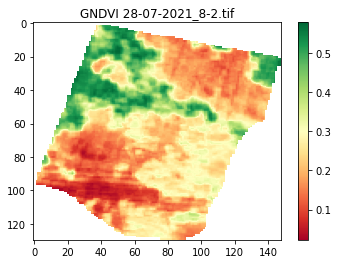

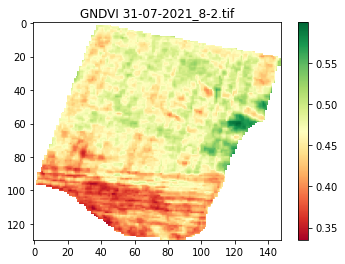

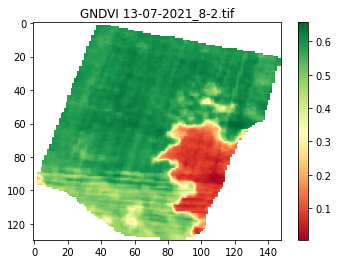

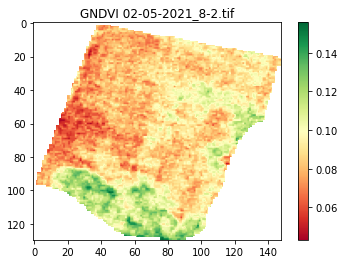

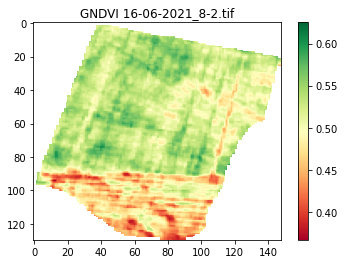

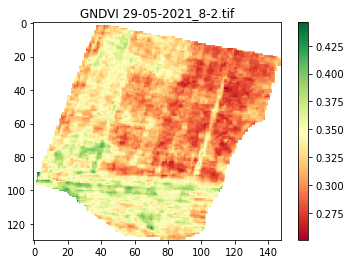

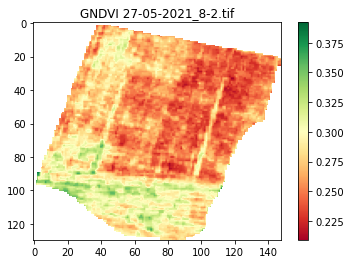

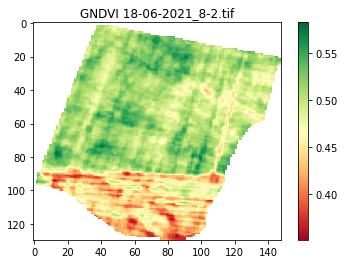

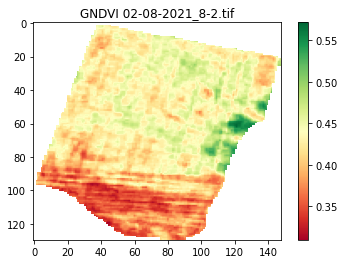

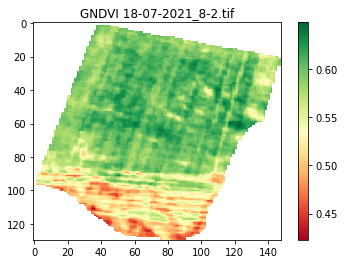

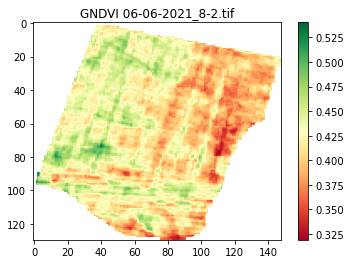

In [17]:
plot_gndvi = [np.zeros(list_gndvi[i].shape) for i in range(len(list_gndvi))]
for j in range(len(plot_gndvi)):
    for i in range(len(list_gndvi[j].reshape(1,-1)[0])):
        plot_gndvi[j].reshape(1,-1)[0][i] = list_gndvi[j].reshape(1,-1)[0][i]
        if plot_gndvi[j].reshape(1,-1)[0][i] == 0:
            plot_gndvi[j].reshape(1,-1)[0][i] = np.nan
            
        
        
for i in range(len(plot_gndvi)):
    fig, axs = plt.subplots(1,1)
    
    
    gndvi_plot = axs.imshow(plot_gndvi[i], cmap="RdYlGn")
    axs.set_title("GNDVI {}".format(dir_list[i]))
    fig.colorbar(gndvi_plot, ax=axs)

    plt.show()

## Нормализованный Разностный Водный Индекс (NDWI)

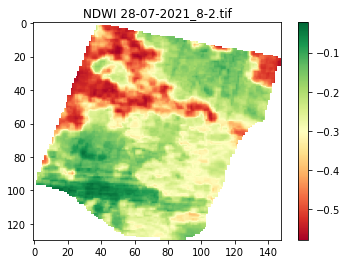

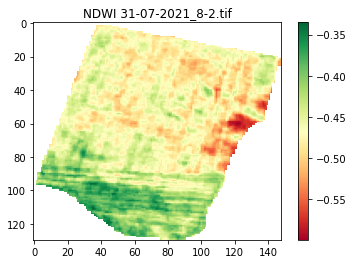

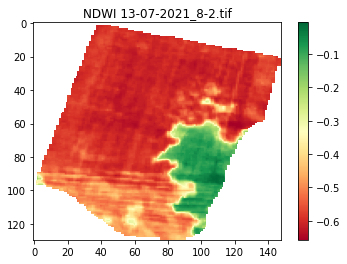

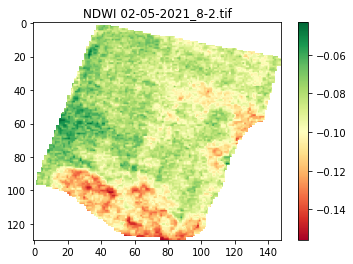

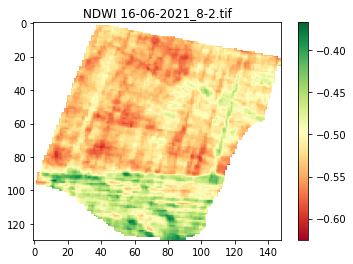

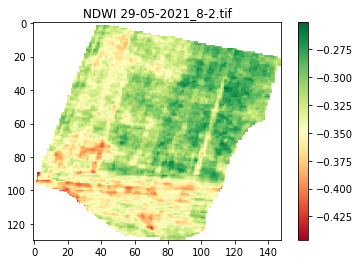

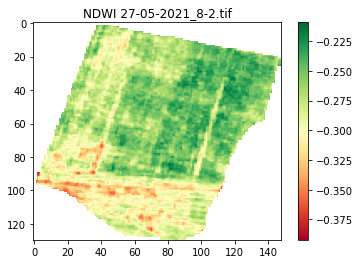

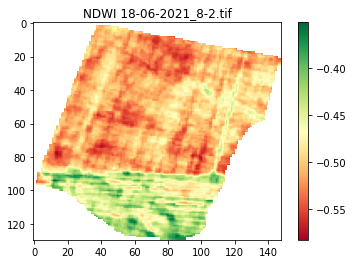

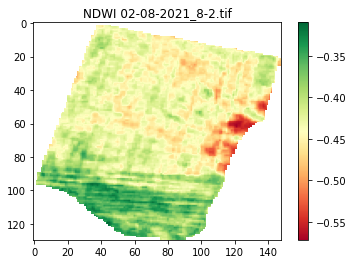

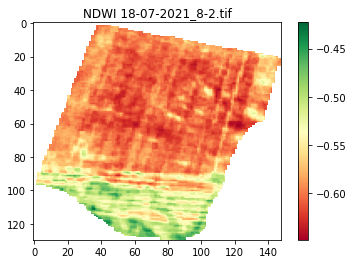

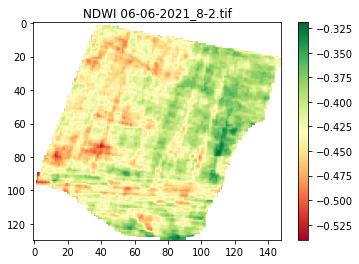

In [18]:
plot_ndwi = [np.zeros(list_ndwi[i].shape) for i in range(len(list_ndwi))]
for j in range(len(plot_ndwi)):
    for i in range(len(list_ndwi[j].reshape(1,-1)[0])):
        plot_ndwi[j].reshape(1,-1)[0][i] = list_ndwi[j].reshape(1,-1)[0][i]
        if plot_ndwi[j].reshape(1,-1)[0][i] == 0:
            plot_ndwi[j].reshape(1,-1)[0][i] = np.nan
            
        
        
for i in range(len(plot_ndwi)):
    fig, axs = plt.subplots(1,1)
    
    
    ndwi_plot = axs.imshow(plot_ndwi[i], cmap="RdYlGn")
    axs.set_title("NDWI {}".format(dir_list[i]))
    fig.colorbar(ndwi_plot, ax=axs)

    plt.show()

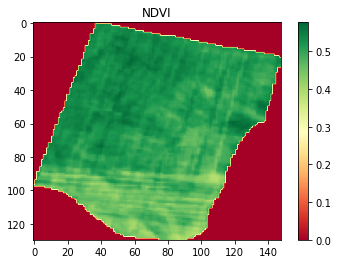

In [19]:
new_ndvi = mdn(list_ndvi, page, shape)

plot_(new_ndvi, "NDVI")

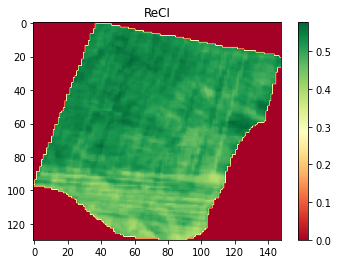

In [20]:
new_reci = mdn(list_reci, page, shape)

plot_(new_ndvi, "ReCI")

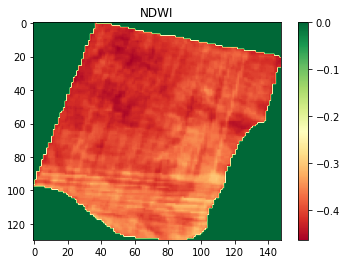

In [21]:
new_ndwi = mdn(list_ndwi, page, shape)

plot_(new_ndwi, "NDWI")

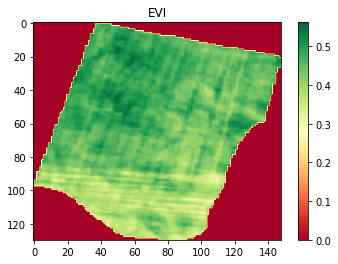

In [22]:
new_evi = mdn(list_evi, page, shape)

plot_(new_evi, "EVI")

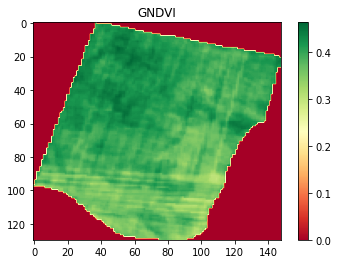

In [23]:
new_gndvi = mdn(list_gndvi, page, shape)

plot_(new_gndvi, "GNDVI")

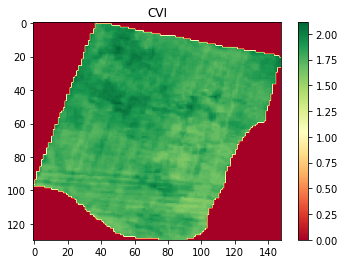

In [24]:
new_cvi = mdn(list_cvi, page, shape)

plot_(new_cvi, "CVI")

## 4.1 Кластеризация

In [25]:
# Метод k-средних (KMeans)

centroids = np.array([[0],[0.165],[0.495],[0.825]])

kmn = KMeans(n_clusters=4, init=centroids, random_state=2022, n_init=1)

img = new_ndvi.flatten().reshape(-1, 1)
param = kmn.fit(img) 
img_kmn = kmn.labels_

img_cl = img_kmn.reshape(new_ndvi.shape)

In [26]:
centroids

array([[0.   ],
       [0.165],
       [0.495],
       [0.825]])

## Season Average NDVI

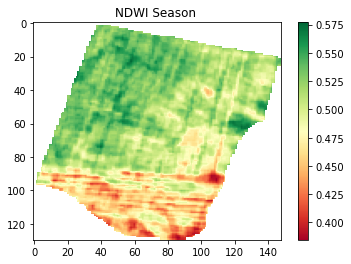

In [27]:
season_ndvi_plot = np.zeros(new_ndvi.shape)
for i in range(len(new_ndvi.reshape(1,-1)[0])):
    season_ndvi_plot.reshape(1,-1)[0][i] = new_ndvi.reshape(1,-1)[0][i]
    if season_ndvi_plot.reshape(1,-1)[0][i] == 0:
        season_ndvi_plot.reshape(1,-1)[0][i] = np.nan
fig, axs = plt.subplots(1,1)


ndwi_plot_s = axs.imshow(season_ndvi_plot, cmap="RdYlGn")
axs.set_title("NDWI Season ")
fig.colorbar(ndwi_plot_s, ax=axs)

plt.show()

## 5.1 Карта продуктивности

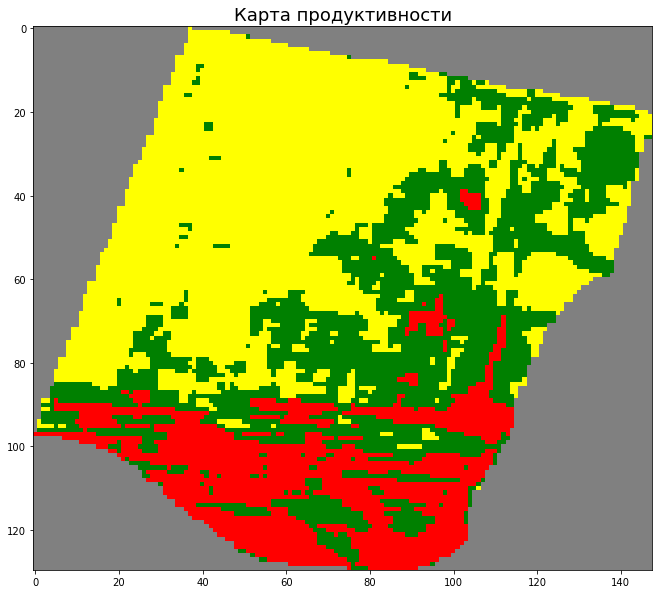

In [28]:
fig, ax = plt.subplots(figsize=(14, 10))
cmap = LinearSegmentedColormap.from_list("", ['gray', 'red', 'yellow', 'green'])
im = plt.imshow(np.array(img_cl+1), cmap=cmap)
ax.set_title("Карта продуктивности", size = 18)

plt.show()

## 6.1 Матрица продуктивности

In [29]:
v = []
for i in range(1, 149):
    v.append('V'+str(i))

df = pd.DataFrame(img_cl+1, columns = v)
df

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V139  V140  V141  V142  \
0     1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
1     1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
2     1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
3     1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
4     1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
125   1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
126   1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
127   1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
128   1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   
129   1   1   1   1   1   1   1   1   1    1  ...     1     1     1     1   

     V143  V144  V145  V146  V147  V148  
0       1     1     1     1     1     1  
1       1     1     1     1     1     1  
2       1     1     1     1     1     1  
3       1     1     1     1     1     1  
4       1     1     1     1     1     1  
..    ...   ...   ...   ...   ...   ...  
125     1     1     1     1     1     1  
126     1     1     1     1     1     1  
127     1     1     1     1     1     1  
128     1     1     1     1     1     1  
129     1     1     1     1     1     1  

[130 rows x 148 columns]

## Выбранное поле

In [30]:
# Создание листов для 6х индексов
list_ndvi = []
list_reci = []
list_ndwi = []
list_evi = []
list_gndvi = []
list_cvi = []

for file in dir_list_land:
    dataset = rs.open("/Users/mereyorazaly/Desktop/поле_датасет/{}".format(file))
    
    # Обозначаем диапазоны 
    NIR = dataset.read(4)
    Red = dataset.read(3)
    Blue = dataset.read(2)
    Green = dataset.read(1)
    
    # Вычисление индексов
    ndvi = ndvi_cc(NIR, Red)
    reci = reci_cc(NIR, Red)
    ndwi = ndwi_cc(NIR, Green)
    evi = evi_cc(NIR, Red, Blue)
    gndvi = gndvi_cc(NIR, Green)
    cvi = cvi_cc(NIR, Red, Green)
    
    # Отправляем значения в листы 
    list_ndvi.append(ndvi)
    list_reci.append(reci)
    list_ndwi.append(ndwi)
    list_evi.append(evi)
    list_gndvi.append(gndvi)
    list_cvi.append(cvi)

In [31]:
page = len(list_ndvi)
print(page)

shape = list_ndvi[0].shape
print(shape, shape[0], shape[1])

8
(269, 234) 269 234


In [32]:
def mdn(lst, page, shape):
    new = np.zeros(shape)
    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            res = 0 
            for pg in range(0, page):
                res += lst[pg][i][j]
            new[i][j] = res/int(page)
    return new

In [33]:
def plot_(lst, name):
    fig, axs = plt.subplots()
    plot_ = axs.imshow(lst, cmap="RdYlGn")
    axs.set_title(name)
    fig.colorbar(plot_, ax=axs)
    plt.show()

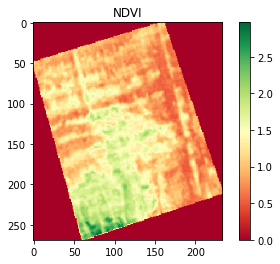

In [34]:
new_ndvi = mdn(list_ndvi, page, shape)

plot_(new_ndvi, "NDVI")

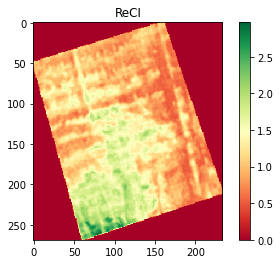

In [35]:
new_reci = mdn(list_reci, page, shape)

plot_(new_ndvi, "ReCI")

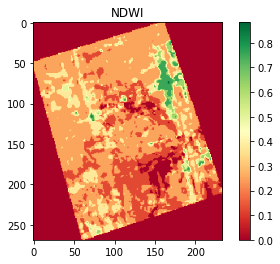

In [36]:
new_ndwi = mdn(list_ndwi, page, shape)

plot_(new_ndwi, "NDWI")

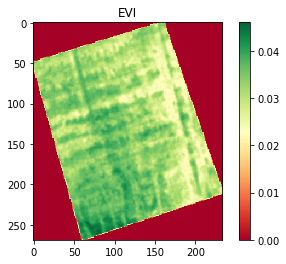

In [37]:
new_evi = mdn(list_evi, page, shape)

plot_(new_evi, "EVI")

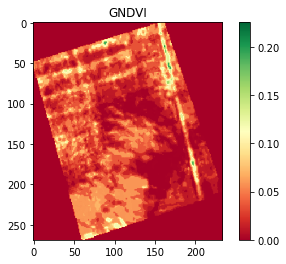

In [38]:
new_gndvi = mdn(list_gndvi, page, shape)

plot_(new_gndvi, "GNDVI")

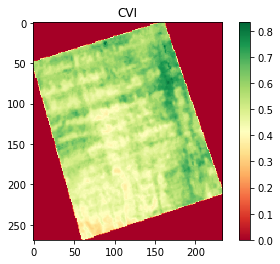

In [39]:
new_cvi = mdn(list_cvi, page, shape)

plot_(new_cvi, "CVI")

## Vegetation Rating layer

In [40]:
plot_ndvi = [np.zeros(list_ndvi[i].shape) for i in range(len(list_ndvi))]
for j in range(len(plot_ndvi)):
    for i in range(len(list_ndvi[j].reshape(1,-1)[0])):
        plot_ndvi[j].reshape(1,-1)[0][i] = list_ndvi[j].reshape(1,-1)[0][i]
        if plot_ndvi[j].reshape(1,-1)[0][i] == 0:
            plot_ndvi[j].reshape(1,-1)[0][i] = np.nan

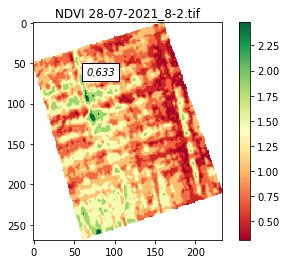

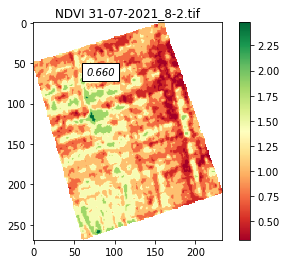

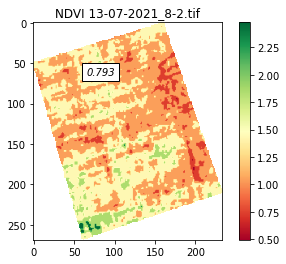

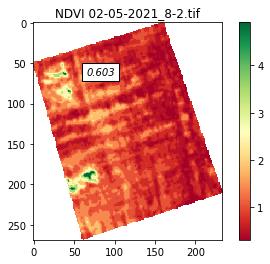

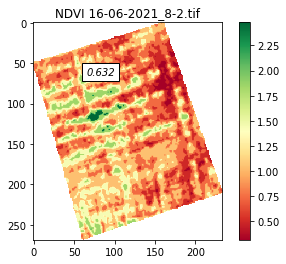

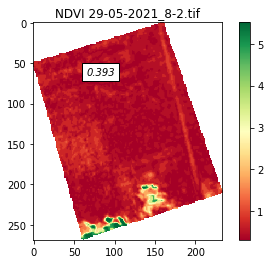

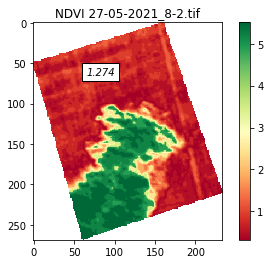

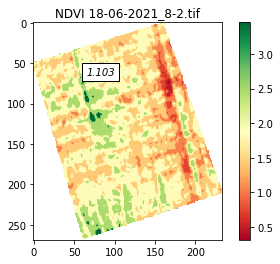

In [41]:
for i in range(len(list_ndvi)):
    mean_ndvi = list_ndvi[i].reshape(1,-1)[0].mean()
    
    fig, axs = plt.subplots(1,1)
    
    
    ndvi_plot = axs.imshow(plot_ndvi[i], cmap="RdYlGn")
    axs.set_title("NDVI {}".format(dir_list[i]))
    fig.colorbar(ndvi_plot, ax=axs)

    axs.text(65, 65, "{:.3f}".format(mean_ndvi), style='italic',
        bbox={'facecolor': 'white'})
    plt.show()

## 4.2 Кластеризация

In [42]:
# Метод k-средних (KMeans)

centroids = np.array([[0],[0.165],[0.495],[0.825]])

kmn = KMeans(n_clusters=4, init=centroids, random_state=2022, n_init=1)

img = new_ndvi.flatten().reshape(-1, 1)
param = kmn.fit(img) 
img_kmn = kmn.labels_

img_cl = img_kmn.reshape(new_ndvi.shape)

In [43]:
centroids

array([[0.   ],
       [0.165],
       [0.495],
       [0.825]])

## 5.2 Карта продуктивности

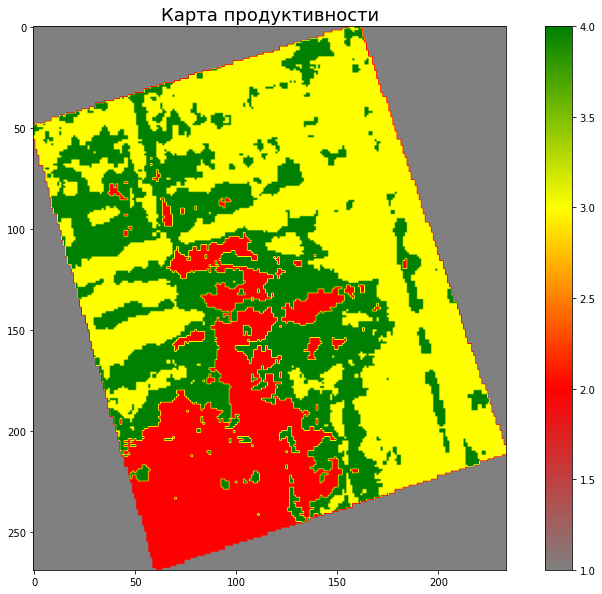

In [44]:
fig, ax = plt.subplots(figsize=(14, 10))
cmap = LinearSegmentedColormap.from_list("", ['gray', 'red', 'yellow', 'green'])
im = plt.imshow(np.array(img_cl+1), cmap=cmap)
ax.set_title("Карта продуктивности", size = 18)
plt.colorbar(im)

plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



<h1 style="text-align: center"> Спасибо за внимание! </h1>
 
<br>

<img src="https://rigea.files.wordpress.com/2015/03/gis.png" width="400" height="400" >

<br>
<br>


<h1 style="text-align: center"> Готовы ответить на ваши вопросы :) </h1> 


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>